## Importing Libraries and Packages

from google.colab import drive

drive.mount("/content/drive")

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as w
w.filterwarnings('ignore')
%matplotlib inline


In [49]:
pd.set_option("display.max_columns", None)
pd.set_option("max_colwidth", None)


## Reading the Dataset

In [50]:
df = pd.read_csv(
    r"C:\Users\harsh\ML Assign\Data Sets\MLK\Tel-Customer-Churn.csv")


In [51]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Structure and Summary

In [52]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


After printing the statistics of data we got to know that the data distribution is appropriate.

## Checking the null values

In [53]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

So there are no null values in the dataset

## Checking the structure of the dataset

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [55]:
for i in list(df.columns):
    print(i, " ", df[i].unique())


customerID   ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender   ['Female' 'Male']
SeniorCitizen   [0 1]
Partner   ['Yes' 'No']
Dependents   ['No' 'Yes']
tenure   [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService   ['No' 'Yes']
MultipleLines   ['No phone service' 'No' 'Yes']
InternetService   ['DSL' 'Fiber optic' 'No']
OnlineSecurity   ['No' 'Yes' 'No internet service']
OnlineBackup   ['Yes' 'No' 'No internet service']
DeviceProtection   ['No' 'Yes' 'No internet service']
TechSupport   ['No' 'Yes' 'No internet service']
StreamingTV   ['No' 'Yes' 'No internet service']
StreamingMovies   ['No' 'Yes' 'No internet service']
Contract   ['Month-to-month' 'One year' 'Two year']
PaperlessBilling   ['Yes' 'No']
PaymentMethod   ['Electronic check' 'Mailed check' 'Bank tr

# Cleaning the data

In [56]:
# Dropping the customerID column as it is not required for the analysis
df.drop(["customerID"], axis=1, inplace=True)

## Check the data types are appropriate and converting them into categories or encoding them wherever required

for i in [
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
]:
    df[i].replace("No internet service", "No", inplace=True)

In [57]:
# df["MultipleLines"].replace("No phone service", "No", inplace=True)
df.Contract.replace("Month-to-month", "Monthly", inplace=True)
# df["InternetService"].replace(["DSL", "Fiber optic"], "Yes", inplace=True)

### Cleaning Totalcharges column and converting it into numerical value

In [58]:
df.TotalCharges.replace(" ", "0.0", inplace=True)
df.TotalCharges = df.TotalCharges.astype(float)
df.TotalCharges.isna().sum()

0

In [59]:
for i in list(df.columns):
    print(i, " ", df[i].unique())


gender   ['Female' 'Male']
SeniorCitizen   [0 1]
Partner   ['Yes' 'No']
Dependents   ['No' 'Yes']
tenure   [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService   ['No' 'Yes']
MultipleLines   ['No phone service' 'No' 'Yes']
InternetService   ['DSL' 'Fiber optic' 'No']
OnlineSecurity   ['No' 'Yes' 'No internet service']
OnlineBackup   ['Yes' 'No' 'No internet service']
DeviceProtection   ['No' 'Yes' 'No internet service']
TechSupport   ['No' 'Yes' 'No internet service']
StreamingTV   ['No' 'Yes' 'No internet service']
StreamingMovies   ['No' 'Yes' 'No internet service']
Contract   ['Monthly' 'One year' 'Two year']
PaperlessBilling   ['Yes' 'No']
PaymentMethod   ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges   [29.85 56.95 53.85 ... 63.1  44.2  78.7 

## Encoding Variables

In [60]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [61]:
coltoenc = [
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "Contract",
    "PaperlessBilling",
    "Churn",
]


In [62]:
for i in coltoenc:
    df[i] = le.fit_transform(df[i])

In [63]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,0,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,1,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,0,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,1,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,0,1,Electronic check,70.70,151.65,1


## Hot Encoding the variables or Dummifying the variables

In [64]:
# Dummiying the remaining categorical columns

for i in [
    "gender",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "PaymentMethod",
]:
    df = pd.concat([df, pd.get_dummies(df[i], prefix=i,drop_first=True)], axis=1)
    df.drop(i, axis=1, inplace=True)

In [65]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,29.85,29.85,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,34,1,1,0,56.95,1889.50,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
2,0,0,0,2,1,0,1,53.85,108.15,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,45,0,1,0,42.30,1840.75,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0
4,0,0,0,2,1,0,1,70.70,151.65,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


# Plotting Correlation Matrix

<Axes: >

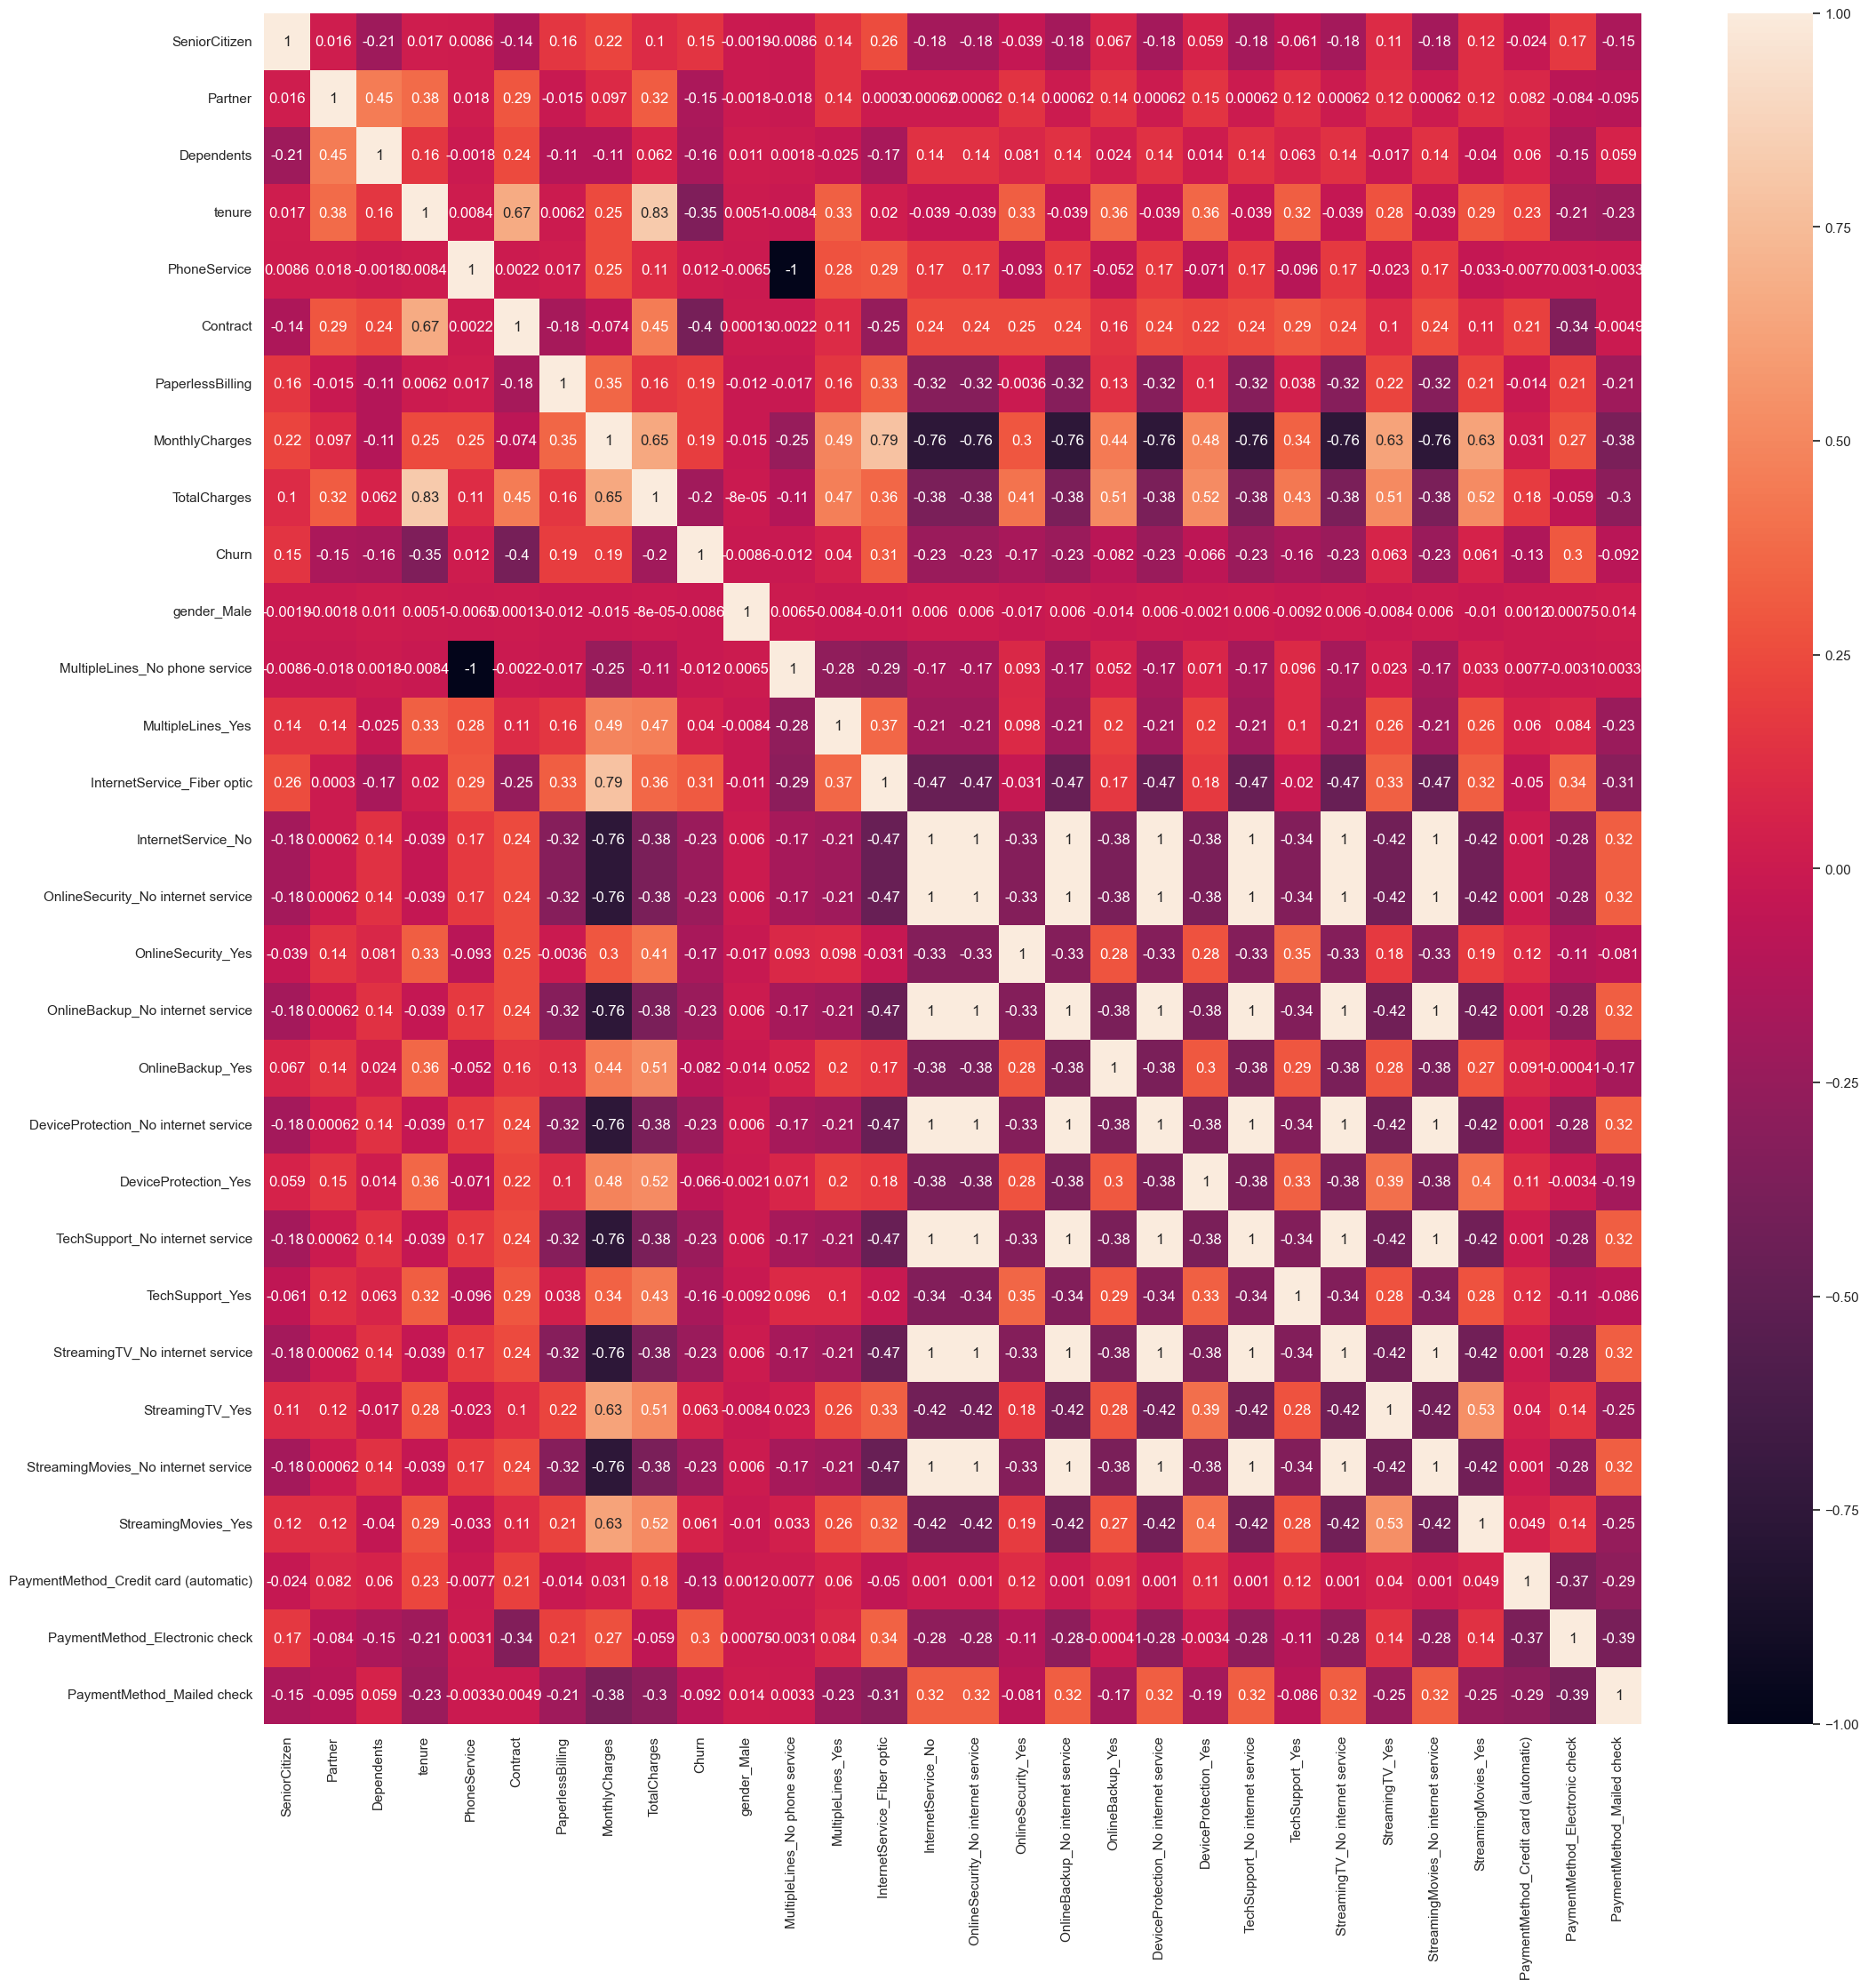

In [66]:
plt.figure(figsize=(25, 25))
sns.heatmap(df.corr(), annot=True)


In [67]:
# Getting the column name with correlation greater than 0.1 and less than -0.1

corr = df.corr()['Churn']
featwithcorr = list(corr[(corr < -0.2) | (corr > 0.2)].index)

## Querying the data to get churn based on Contarct types

In [68]:
a = df[["Churn", "Contract", "gender_Male"]].groupby(
    ["Churn", "Contract"]).count()
a.reset_index(inplace=True)


## Plot of Churn vs Contract

Text(46.11280685763889, 0.5, 'Count')

<Figure size 1000x1000 with 0 Axes>

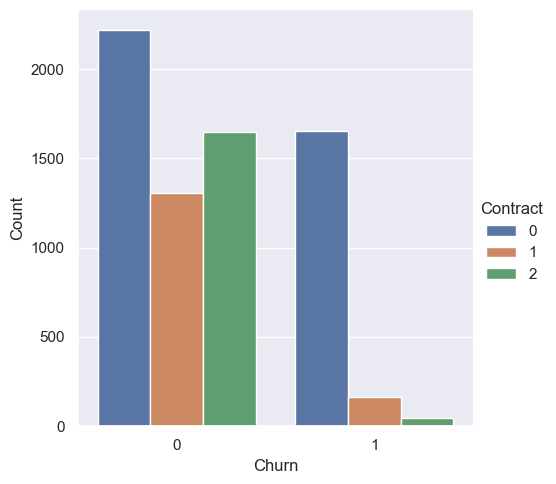

In [69]:
plt.figure(figsize=(10, 10))
sns.set_theme(style="darkgrid")
sns.catplot(x="Churn", y="gender_Male", hue="Contract", data=a, kind="bar")
plt.ylabel("Count")


 We got to know that people Who have churned are mostly the people which have Month-to-Month Contract.

## Querying the dataset for count of PaperlessBilling based on Churn

In [70]:
b = (
    df[["PaperlessBilling", "Churn", "gender_Male"]]
    .groupby(["Churn", "PaperlessBilling"])
    .count()
)
b.reset_index(inplace=True)

## Plot of PaperlessBilling vs Churn

<Figure size 1000x1000 with 0 Axes>

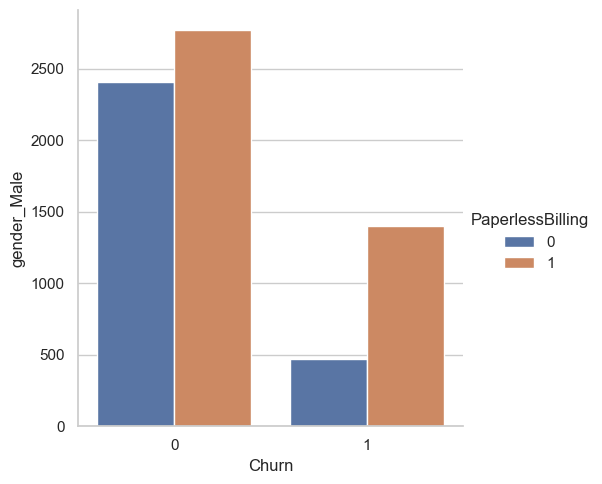

In [71]:
plt.figure(figsize=(10, 10))
sns.set_theme(style="whitegrid")
sns.catplot(x="Churn", y="gender_Male",
            hue="PaperlessBilling", kind="bar", data=b)


> So the people who have no paperlessbiling have churned less than the people who have paperbilling.

## Distribution plot of Tenure

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

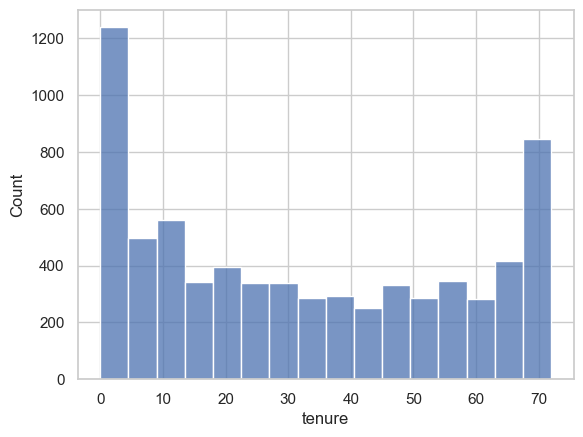

In [72]:
sns.histplot(df["tenure"])
plt.title


## Distribution plot of Monthly Charges

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

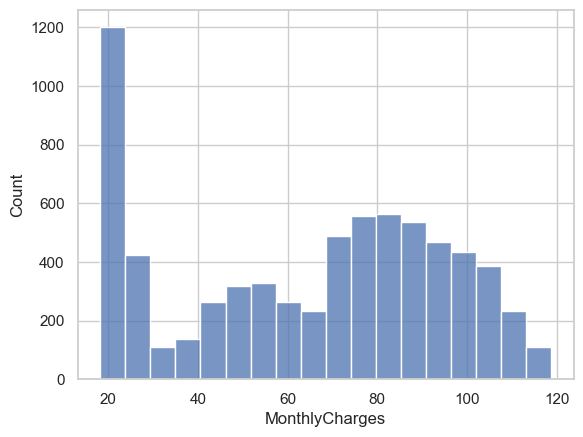

In [73]:
sns.histplot(df["MonthlyCharges"])


MonthlyCharges data is positively skewed.

## Distribution plot of ToatalCharges

<Axes: xlabel='TotalCharges', ylabel='Count'>

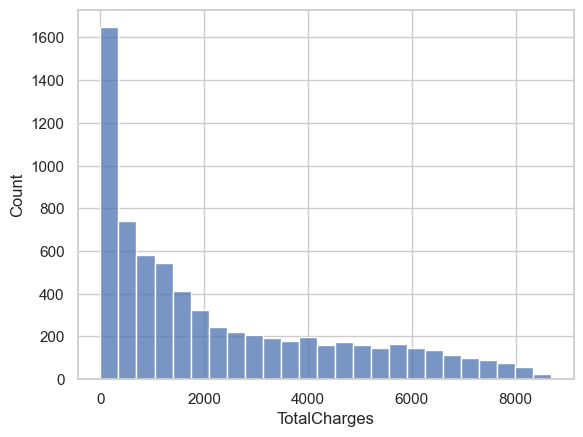

In [74]:
sns.histplot(df["TotalCharges"])

The data distribution is highly positively skewed.

## Density plot of TotalCharges based on Churn

<Axes: xlabel='TotalCharges', ylabel='Density'>

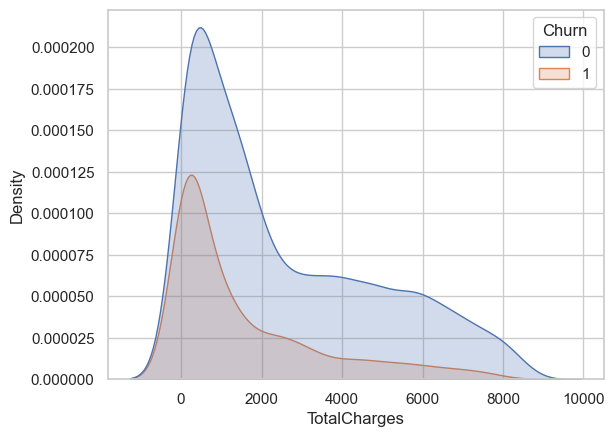

In [75]:
# Plotting TotalCharges distribution based on Churn

sns.kdeplot(data=df, x="TotalCharges", hue="Churn", shade=True)

## Density plot of MonthlyCharges based on Churn

<Axes: xlabel='MonthlyCharges', ylabel='Density'>

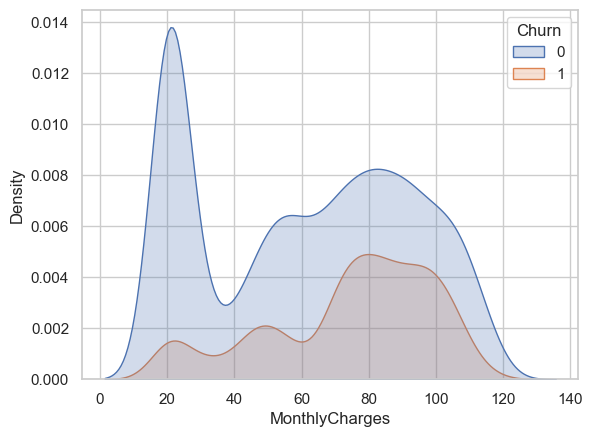

In [76]:
sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", shade=True)

cleaneddata = df.copy(deep=True)
cleanwitselect = cleaneddata[featwithcorr].copy(deep=True)
cleanwitselect.to_csv("cleantelfeat.csv", index=False)
cleaneddata.to_csv("cleantel.csv", index=False)
